In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import  np_utils
from prettytable import PrettyTable
from tensorflow import keras

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation accuracy")
    ax.plot(x, ty, 'r', label="Train accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()
print(train_data[0])

11493376/11490434 [==============================] - 1s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

In [0]:
#normailizing all the inputs 
train_data = train_data/255.0
test_data = test_data/255.0
print(train_data[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
print(train_labels[5])
print("*"*100)
#converting numeric labels into onehot encoding 
train_labels_onehot = np_utils.to_categorical(train_labels)
test_labels_onehot= np_utils.to_categorical(test_labels)
print("One-hot encoding of the y labels: ",train_labels_onehot[5])

2
****************************************************************************************************
One-hot encoding of the y labels:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Model_1: 728-512-64-10 without BN and dropout and random initizliation of weights
#https://www.youtube.com/watch?v=6g4O5UOH304&t=3761s
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(512,activation="sigmoid"),
        keras.layers.Dense(64,activation="sigmoid"),
        keras.layers.Dense(10,activation="softmax")
]) #skeleton of the model is ready
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer= "adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_data,train_labels_onehot,epochs=10,batch_size=64,shuffle=True,validation_split=0.3,validation_data=(test_data,test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4656 - acc: 0.8809 - val_loss: 0.2267 - val_acc: 0.9343
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1905 - acc: 0.9445 - val_loss: 0.1609 - val_acc: 0.9522
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1315 - acc: 0.9619 - val_loss: 0.1266 - val_acc: 0.9623
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0956 - acc: 0.9721 - val_loss: 0.1124 - val_acc: 0.9638
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0718 - acc: 0.9790 - val_loss: 0.0870 - val_acc: 0.9750
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0546 - acc: 0.9838 - val_loss: 0.0768 - val_acc: 0.9762
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0424 - acc: 0.9876 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
****************************************************************************************************


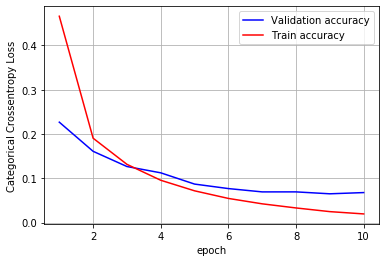

In [0]:
print(history.history.keys())
print("*"*100)
#https://colab.research.google.com/drive/1PMyn9bgjDzhaBm2NO3YQ1f0m-Y2SmZe4#scrollTo=AslSnqQ2QKcF
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Model_2: 728-512-64-32-10 with BN and dropout(p=0.2) with glorot init
#https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
#https://chrisalbon.com/deep_learning/keras/adding_dropout/
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512,activation="hard_sigmoid",kernel_initializer="glorot_normal"),#https://keras.io/initializers/
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64,activation="hard_sigmoid",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation="hard_sigmoid",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation="softmax")
]) #skeleton of the model is ready

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [0]:
model.compile(optimizer= "adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_data,train_labels_onehot,epochs=10,batch_size=64,shuffle=True,validation_split=0.3,validation_data=(test_data,test_labels_onehot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.7594 - acc: 0.8156 - val_loss: 0.2028 - val_acc: 0.9477
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2686 - acc: 0.9338 - val_loss: 0.1305 - val_acc: 0.9649
Epoch 3/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2009 - acc: 0.9473 - val_loss: 0.1071 - val_acc: 0.9701
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1479 - acc: 0.9608 - val_loss: 0.0830 - val_acc: 0.9769
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1342 - acc: 0.9638 - val_loss: 0.0818 - val_acc: 0.9774
Epoch 7/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1238 - acc: 0.9653 - val_loss: 0.0785 - val_acc: 0.9780
Epoch 8/10
60000

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
********************************************************************************


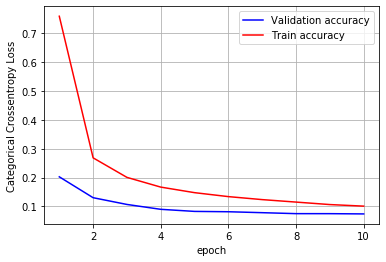

In [0]:
print(history.history.keys())
print("*"*80)
#https://colab.research.google.com/drive/1PMyn9bgjDzhaBm2NO3YQ1f0m-Y2SmZe4#scrollTo=AslSnqQ2QKcF
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [0]:
# Model_3: 728-512-64-32-10 with BN and dropout(p=0.2) with glorot init
#https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
#https://chrisalbon.com/deep_learning/keras/adding_dropout/
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512,activation="tanh",kernel_initializer="glorot_normal"),#https://keras.io/initializers/
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64,activation="tanh",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation="tanh",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation="softmax")
]) #skeleton of the model is ready

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4812 - acc: 0.8613 - val_loss: 0.2208 - val_acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2877 - acc: 0.9159 - val_loss: 0.1570 - val_acc: 0.9532
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2296 - acc: 0.9330 - val_loss: 0.1289 - val_acc: 0.9633
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2015 - acc: 0.9404 - val_loss: 0.1183 - val_acc: 0.9664
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1765 - acc: 0.9480 - val_loss: 0.1044 - val_acc: 0.9715
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1621 - acc: 0.9528 - val_loss: 0.1009 - val_acc: 0.9704
Epoch 7/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1462 - acc: 0.9571 - val_l

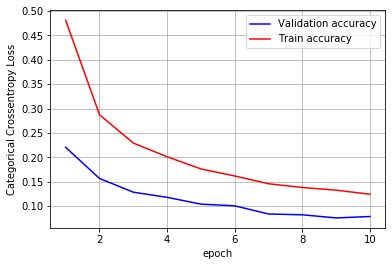

In [0]:
model.compile(optimizer= "adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_data,train_labels_onehot,epochs=10,batch_size=64,shuffle=True,validation_split=0.3,validation_data=(test_data,test_labels_onehot))

print(history.history.keys())
print("*"*80)
#https://colab.research.google.com/drive/1PMyn9bgjDzhaBm2NO3YQ1f0m-Y2SmZe4#scrollTo=AslSnqQ2QKcF
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [0]:
# Model_4: 728-480-120-64-32-10 with BN and dropout(p=0.2) with glorot init
#https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
#https://chrisalbon.com/deep_learning/keras/adding_dropout/
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(480,activation="relu",kernel_initializer="glorot_normal"),#https://keras.io/initializers/
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(), #BN
        keras.layers.Dense(120,activation="relu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64,activation="relu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(), #BN
        keras.layers.Dense(32,activation="relu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation="softmax")
]) #skeleton of the model is ready

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 480)               376800    
_________________________________________________________________
dropout_20 (Dropout)         (None, 480)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 480)               1920      
_________________________________________________________________
dense_47 (Dense)             (None, 120)               57720     
_________________________________________________________________
dropout_21 (Dropout)         (None, 120)             

In [0]:
model.compile(optimizer= "adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_data,train_labels_onehot,epochs=10,batch_size=64,shuffle=True,validation_split=0.3,validation_data=(test_data,test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.5305 - acc: 0.8425 - val_loss: 0.1366 - val_acc: 0.9598
Epoch 2/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.2534 - acc: 0.9306 - val_loss: 0.1108 - val_acc: 0.9669
Epoch 3/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.1994 - acc: 0.9443 - val_loss: 0.1155 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1721 - acc: 0.9525 - val_loss: 0.0849 - val_acc: 0.9742
Epoch 5/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.1586 - acc: 0.9562 - val_loss: 0.0750 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.1455 - acc: 0.9600 - val_loss: 0.0677 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.1346 - acc: 0.9626 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
********************************************************************************


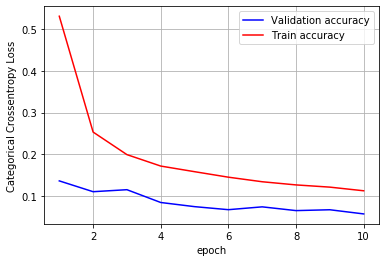

In [0]:
print(history.history.keys())
print("*"*80)
#https://colab.research.google.com/drive/1PMyn9bgjDzhaBm2NO3YQ1f0m-Y2SmZe4#scrollTo=AslSnqQ2QKcF
#Plotting the graph.
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [0]:
# Model_5: 728-480-120-64-32-10 WITHOUT BN and dropout(p=0.5) with glorot init
#https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
#https://chrisalbon.com/deep_learning/keras/adding_dropout/
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dropout(0.5),          #DROPOUT
        keras.layers.Dense(480,activation="selu",kernel_initializer="glorot_normal"),#https://keras.io/initializers/
        keras.layers.Dropout(0.5),          #DROPOUT
        #keras.layers.BatchNormalization(), #BN
        keras.layers.Dense(120,activation="selu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.5),          #DROPOUT
        keras.layers.Dense(64,activation="selu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.5),          #DROPOUT
        #keras.layers.BatchNormalization(), #BN
        keras.layers.Dense(32,activation="selu",kernel_initializer="glorot_normal"),
        keras.layers.Dropout(0.5),          #DROPOUT
        keras.layers.Dense(10,activation="softmax")
]) #skeleton of the model is ready
model.summary()
model.compile(optimizer= "adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_data,train_labels_onehot,epochs=10,batch_size=64,shuffle=True,validation_split=0.3,validation_data=(test_data,test_labels_onehot))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 480)               376800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 480)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               57720     
_________________________________________________________________
dropout_14 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
********************************************************************************


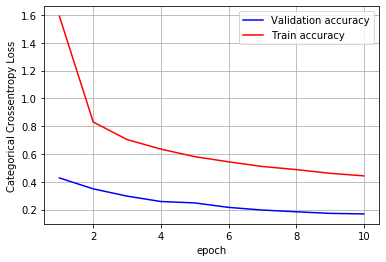

In [0]:
print(history.history.keys())
print("*"*80)
#https://colab.research.google.com/drive/1PMyn9bgjDzhaBm2NO3YQ1f0m-Y2SmZe4#scrollTo=AslSnqQ2QKcF
#Plotting the graph.
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


#                                    **Summary of All Models on MNIST Dataset:**

In [0]:
#http://zetcode.com/python/prettytable/
x = PrettyTable()
x.field_names = ["Model #", "#Layers", "Dropout+BN", "Accuracy","activation f(x)"]
x.add_row(["Model_1", "728-512-64-10", "No", 98.07,"sigmoid"])
x.add_row(["Model_2", "728-512-64-32-10", "Yes", 97.96,"hard_sigmoid"])
x.add_row(["Model_3", "728-512-64-32-10", "Yes", 98.11,"relu"])
x.add_row(["Model_4", "728-480-120-64-32-10", "Yes", 97.30,"tanh"])
x.add_row(["Model_5", "728-480-120-64-32-10", "No", 95.27,"selu"])
print(x)

+---------+----------------------+------------+----------+-----------------+
| Model # |       #Layers        | Dropout+BN | Accuracy | activation f(x) |
+---------+----------------------+------------+----------+-----------------+
| Model_1 |    728-512-64-10     |     No     |  98.07   |     sigmoid     |
| Model_2 |   728-512-64-32-10   |    Yes     |  97.96   |   hard_sigmoid  |
| Model_3 |   728-512-64-32-10   |    Yes     |  98.11   |       relu      |
| Model_4 | 728-480-120-64-32-10 |    Yes     |   97.3   |       tanh      |
| Model_5 | 728-480-120-64-32-10 |     No     |  95.27   |       selu      |
+---------+----------------------+------------+----------+-----------------+
